In [137]:
from jupyterthemes import jtplot
jtplot.style('gruvboxl')

# Financial data analysis

Chapters:

1. Data 
2. statistics of returns
3. *Correlation* and *lagged correlation* matrix
4. PCA

Lagged effects

5. SVD


## 1. data

In [2]:
# Importing 
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime 
yf.pdr_override()
plt.rcParams["figure.figsize"] = [10,10]  # Set default figure size
import requests

In [85]:
def import_data(tickers, start, end, interval = "1d"):
    
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    # empty dictionary to store the DataFrames
    dfs = {}

    # collect into a DataFrame
    for ticker in tickers:
        df = pdr.get_data_yahoo(f'{ticker}', pd.to_datetime(start), pd.to_datetime(end), interval, repair = True)
        dfs[ticker] = df
    return dfs

- importing **financial data** on a smart dictionary data structure

***the routine is: 
    test your results and instruments on the list of ten stickers and then when everything works well and is sorted out go to the tkrs -> listed list***

In [94]:
# list of tickers 

#tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'KO', 'PEP', 'JNJ', 'PFE', 'NVDA', 'IBM']

tkrs = ['AAPL', 'ABBV', 'ABT', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AIG', 'AMAT', 'AMD',
    'AMGN', 'AMT', 'AMZN', 'AON', 'APA', 'APD', 'ATVI', 'AVGO', 'AXP', 'BA',
    'BAC', 'BAX', 'BBY', 'BDX', 'BK', 'BKNG', 'BLK', 'BMY', 'C', #'CAT',
        'CELG',
    'CERN', 'CHTR', 'CI', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMI', 'CMS', 
    'COF', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DE', 'DHR', 'DIS', 'DOW',
    'DTE', 'DUK', 'DVA', 'EA', 'EBAY', 'ECL', 'ED', 'EMN', 'EMR', 'EOG', 'EQR',
    'ES', 'ETN', 'EXC', 'EXPD', 'F', 'FB', 'FDX', 'FE', 'FIS', 'FISV', 'FLIR',
    'FLR', 'FMC', 'FOX', 'FOXA', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG',
    'GOOGL', 'GPC', 'GPN', 'GS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HIG', 'HON',
    'HPQ', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU',
    'IP', 'IPG', 'IQV', 'ISRG', 'IT', 'ITW', 'IVZ', 'JCI', 'JNJ', 'JPM', 'K',
    'KEY', 'KEYS', 'KHC', 'KMI', 'KO', 'KR', 'LB', 'LEG', 'LH', 'LIN', 'LLY',
    'LMT', 'LOW', 'LRCX', 'LUV', 'LYB', 'MA', 'MAR', 'MAS', 'MCD', 'MCHP',
    'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MOS', 'MRK', 'MS', 'MSFT',
    'MU', 'MXIM', 'MYL', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOV', 'NOW', 'NSC',
    'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'OKE', 'OMC', 'ORCL', 'OXY',
    'PAYX', 'PBCT', 'PCAR', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM',
    'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU',
    'PSA']
len(tkrs) #192

delisted_stocks = ["CELG", "CERN", "FB","FLIR", "LB", "MXIM", "MYL", "PBCT"]

listed = [x for x in tkrs if x not in delisted_stocks]
len(listed) # 184

183

Importing the (listed) tickers:

In [96]:
start='2005-01-01'
end='2022-12-23'

dfs = import_data(listed, start, end)
dfs

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2005-01-03    1.156786    1.162679    1.117857    1.130179    0.961916   
 2005-01-04    1.139107    1.169107    1.124464    1.141786    0.971795   
 2005-01-05    1.151071    1.165179    1.143750    1.151786    0.980306   
 2005-01-06    1.154821    1.159107    1.130893    1.152679    0.981066   
 2005-01-07    1.160714    1.243393    1.156250    1.236607    1.052498   
 ...                ...         ...         ...         ...         ...   
 2022-12-16  136.690002  137.649994  133.729996  134.509995  134.304932   
 2022-12-19  135.110001  135.199997  131.320007  132.369995  132.168198   
 2022-12-20  131.389999  133.250000  129.889999  132.300003  132.098312   
 2022-12-21  132.979996  136.809998  132.750000  135.449997  135.243500   
 2022-12-22  134.350006  134.559998  130.300003  132.229996  132.028412   
 
               

In [107]:
def to_delete(dfs, start, end):
    to_del = {}
    for ticker, df in dfs.items():
        start_date = df.index[0]
        end_date = df.index[-1]
        #print(f"{ticker} start date: {start_date}")
        if start_date > pd.to_datetime('2005-01-03') or end_date < pd.to_datetime('2022-12-22'):
            to_del[ticker] = start_date
    return to_del
 
#-----
to_del = to_delete(dfs, start, end)
len(to_del)

18

In [110]:
def listed_tickers(tickers, to_del):
    listed_true = [x for x in tickers if x not in to_del.keys()]
    return listed_true

# in case you already have uploaded on a dfs ---> otherwise useless function 
def delete_unlisted(dfs, to_del):
    for key in to_del.keys():
        dfs.pop(key)
    return dfs

#-----
listed_true = listed_tickers(listed, to_del)
print(len(listed_true)) # ok

dfs = delete_unlisted(dfs, to_del)
len(dfs)

165


KeyError: 'ABBV'

- indexing the sectors

In [112]:
def ind_ticks_to_sect(tickers):
    '''
    input: list of orderly tickers used
    return: a np list with elements corresponding to the sector at which the i-th stock belong.
    '''
    
    tick_sect = []
    
    for tik in tickers:
        a = yf.Ticker(str(tik))
        tick_sect.append(a.info['sector'])
        print(f'{tik} is okay')
    return tick_sect

tick = ind_ticks_to_sect(listed_true) 
len(tick) # ok!

AAPL is okay
ABT is okay
ADBE is okay
ADI is okay
ADP is okay
ADSK is okay
AIG is okay
AMAT is okay
AMD is okay
AMGN is okay
AMT is okay
AMZN is okay
AON is okay
APA is okay
APD is okay
ATVI is okay
AXP is okay
BA is okay
BAC is okay
BAX is okay
BBY is okay
BDX is okay
BK is okay
BKNG is okay
BLK is okay
BMY is okay
C is okay
CI is okay
CL is okay
CLX is okay
CMA is okay
CMCSA is okay
CME is okay
CMI is okay
CMS is okay
COF is okay
COP is okay
COST is okay
CSCO is okay
CVS is okay
CVX is okay
DD is okay
DE is okay
DHR is okay
DIS is okay
DTE is okay
DUK is okay
DVA is okay
EA is okay
EBAY is okay
ECL is okay
ED is okay
EMN is okay
EMR is okay
EOG is okay
EQR is okay
ES is okay
ETN is okay
EXC is okay
EXPD is okay
F is okay
FDX is okay
FE is okay
FIS is okay
FISV is okay
FLR is okay
FMC is okay
GD is okay
GE is okay
GILD is okay
GIS is okay
GLW is okay
GOOG is okay
GOOGL is okay
GPC is okay
GPN is okay
GS is okay
GWW is okay
HAL is okay
HAS is okay
HD is okay
HES is okay
HIG is okay
HON

165

- cleaning data and defining the variables 

In [113]:
# Fill NaN values with the mean value for each variable across all the tickers
for ticker, df in dfs.items():
    means = df.mean()  # Calculate the mean value for each variable in the DataFrame
    df.fillna(value=means, inplace=True)  # Fill NaN values with the mean value

In [114]:
# Returns and log-returns and rescaled log
for ticker, df in dfs.items():
    #df['returns'] = df['Adj Close'].diff()
    df['returns'] = df['Adj Close'].pct_change()
    df['log_returns'] = np.log(df['Adj Close']).diff()
    df['resc_log_ret'] = ( df['log_returns'] - df['log_returns'].mean() )/df['log_returns'].std()

In [115]:
# drop the first row
for ticker, df in dfs.items():
    df.drop(index=df.index[0], axis=0, inplace=True)

- Visualize the data

In [116]:
# Print the first few rows of each DataFrame
for ticker, df in dfs.items():
    print(f'DataFrame for {ticker}:')
    print(df.head())
    #print(df.tail())
    print('\n')

DataFrame for AAPL:
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2005-01-04  1.139107  1.169107  1.124464  1.141786   0.971795  1096810400   
2005-01-05  1.151071  1.165179  1.143750  1.151786   0.980306   680433600   
2005-01-06  1.154821  1.159107  1.130893  1.152679   0.981066   705555200   
2005-01-07  1.160714  1.243393  1.156250  1.236607   1.052498  2227450400   
2005-01-10  1.246964  1.262500  1.212143  1.231429   1.048092  1725309600   

            Dividends  Stock Splits   returns  log_returns  resc_log_ret  
Date                                                                      
2005-01-04        0.0           0.0  0.010270     0.010218      0.437455  
2005-01-05        0.0           0.0  0.008758     0.008720      0.365689  
2005-01-06        0.0           0.0  0.000775     0.000775     -0.014998  
2005-01-07        0.0           0.0  0.072811     0.070282      3

2005-01-10        0.0           0.0  0.004496     0.004486      0.221598  


DataFrame for DD:
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2005-01-04  70.394920  71.049629  68.174622  68.872025  39.515987  3809468   
2005-01-05  69.028580  69.669052  67.676476  68.174622  39.115856  2136840   
2005-01-06  68.174622  69.569427  68.174622  68.957420  39.564987  2133046   
2005-01-07  69.256310  69.412865  68.260017  68.302711  39.189354  2282139   
2005-01-10  68.402344  69.711754  68.117691  69.313240  39.769142  2569014   

            Dividends  Stock Splits   returns  log_returns  resc_log_ret  
Date                                                                      
2005-01-04        0.0           0.0 -0.021634    -0.021871     -0.999762  
2005-01-05        0.0           0.0 -0.010126    -0.010177     -0.467960  
2005-01-06        0.0           0.0  0.011482     0.011417

2005-01-10        0.0           0.0  0.006242     0.006223      0.296349  


DataFrame for GPC:
                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2005-01-04  43.919998  43.919998  42.889999  43.220001  24.483759  346800   
2005-01-05  43.369999  43.369999  42.650002  42.740002  24.211845  278900   
2005-01-06  42.630001  43.000000  42.500000  42.840000  24.268486  374600   
2005-01-07  42.990002  42.990002  42.400002  42.549999  24.104206  316000   
2005-01-10  42.599998  43.080002  42.230000  42.959999  24.336473  456000   

            Dividends  Stock Splits   returns  log_returns  resc_log_ret  
Date                                                                      
2005-01-04        0.0           0.0 -0.009170    -0.009212     -0.629161  
2005-01-05        0.0           0.0 -0.011106    -0.011168     -0.756743  
2005-01-06        0.0           0.0  0.002339     0.002337      

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2005-01-04  63.099998  63.240002  62.619999  62.700001  37.441032  6989600   
2005-01-05  62.869999  63.090000  62.590000  62.660000  37.417152  6888100   
2005-01-06  62.750000  63.090000  62.689999  62.840000  37.524643  5277500   
2005-01-07  62.980000  63.000000  62.570000  62.610001  37.387283  5037800   
2005-01-10  62.730000  63.220001  62.599998  63.099998  37.679893  5419300   

            Dividends  Stock Splits   returns  log_returns  resc_log_ret  
Date                                                                      
2005-01-04        0.0           0.0 -0.003179    -0.003185     -0.325177  
2005-01-05        0.0           0.0 -0.000638    -0.000638     -0.090301  
2005-01-06        0.0           0.0  0.002873     0.002869      0.233129  
2005-01-07        0.0           0.0 -0.003661    -0.003667     -0.369696  
200

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2005-01-04  1.702857  1.707143  1.607143  1.665714   1.665714  17352300   
2005-01-05  1.677143  1.677143  1.584286  1.600000   1.600000  12732300   
2005-01-06  1.600000  1.624286  1.572857  1.578571   1.578571   8273300   
2005-01-07  1.587143  1.650000  1.571429  1.588571   1.588571   7490700   
2005-01-10  1.585714  1.677143  1.585714  1.610000   1.610000   9934400   

            Dividends  Stock Splits   returns  log_returns  resc_log_ret  
Date                                                                      
2005-01-04        0.0           0.0 -0.021812    -0.022054     -0.705482  
2005-01-05        0.0           0.0 -0.039451    -0.040250     -1.258944  
2005-01-06        0.0           0.0 -0.013393    -0.013484     -0.444823  
2005-01-07        0.0           0.0  0.006335     0.006315      0.157360  
2005-01-10        0.0   

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2005-01-04  16.910000  17.000000  16.450001  16.549999  13.785225  674100   
2005-01-05  16.469999  16.790001  16.389999  16.420000  13.676942  409200   
2005-01-06  16.570000  16.740000  16.400000  16.500000  13.743581  445900   
2005-01-07  16.639999  16.639999  16.180000  16.250000  13.535341  548200   
2005-01-10  16.209999  16.459999  16.059999  16.360001  13.626966  487400   

            Dividends  Stock Splits   returns  log_returns  resc_log_ret  
Date                                                                      
2005-01-04        0.0           0.0 -0.025898    -0.026239     -1.237591  
2005-01-05        0.0           0.0 -0.007855    -0.007886     -0.377792  
2005-01-06        0.0           0.0  0.004872     0.004861      0.219348  
2005-01-07        0.0           0.0 -0.015152    -0.015268     -0.723605  
2005-01-10

In [117]:
# extract the rescaled logreturns price column from each dataframe and store them in a new dictionary
returns = {}
for symbol, df in dfs.items():
    returns[symbol] = df['resc_log_ret']

# create a new dataframe containing the adjusted close price data for all stocks
returns_df = pd.DataFrame(returns)
returns_df.head(10)

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,0.437455,-0.759271,-1.264348,-1.441383,-1.149306,-2.736787,0.097676,-0.844573,-1.582635,-0.998731,...,-0.676720,-0.031898,-0.303918,-1.157504,-0.120613,-1.333547,-0.757702,-1.237591,-0.260002,-0.672007
2005-01-05,0.365689,-0.861071,-0.279571,0.210056,-0.325270,0.297185,0.426621,-0.754686,-0.635695,-0.994996,...,-1.629858,-1.577012,-0.379433,-1.560428,-1.657084,-0.839469,-0.971454,-0.377792,-0.353182,-1.872084
2005-01-06,-0.014998,1.571339,-0.798343,-0.108934,-0.504451,-0.210429,0.055258,-0.338452,-0.048135,0.542637,...,0.500808,0.331231,0.264897,0.179925,-0.682848,0.786977,-0.439941,0.219348,0.238498,0.119415
2005-01-07,3.315340,1.189146,0.007063,0.050444,-0.165848,-0.949530,0.058900,0.113695,0.269121,0.103071,...,-0.048343,-0.099332,-0.262492,0.091584,0.504314,0.256818,-0.299580,-0.723605,-0.465652,0.214856
2005-01-10,-0.253132,0.660992,0.007045,-0.225079,0.012622,-0.085478,0.058817,0.033644,0.279941,0.622630,...,0.050999,-0.310760,0.184357,0.614004,0.113411,-0.178489,0.193150,0.307701,0.337704,-0.216890
2005-01-11,-3.211140,-1.362823,-0.578801,-0.503845,0.093653,-2.267166,-0.189783,-0.072636,-8.300325,0.111059,...,-1.050995,-0.429812,0.110589,-0.381525,-0.546757,-0.511789,0.437324,-0.036995,-0.093437,-0.246593
2005-01-12,0.611217,0.136885,0.655673,0.677368,-0.670647,-0.543804,-0.123890,0.979490,0.286027,1.010716,...,-0.099492,-0.454196,-0.249529,-0.046213,-0.243005,0.659367,0.472601,0.447851,-0.034876,-0.034704
2005-01-13,3.023661,-1.423550,-0.624981,-0.692073,-1.389641,-0.256222,-0.279692,-0.753337,0.246900,-0.951589,...,-0.558365,0.202669,-0.519579,0.475658,-0.277956,-0.187079,0.898662,-0.292943,0.036881,0.273302
2005-01-14,0.221644,0.311014,-0.016502,0.763689,1.448222,-0.142292,0.067453,0.714345,-0.006599,-0.099406,...,0.864989,0.162459,-0.013503,0.825112,0.149220,0.178059,0.374885,1.119852,0.527924,0.281106


**UTILS**

In [119]:
def from_df_to_np(x):
    ''' 
    Convert DataFrame to numpy array
    ''' 
    return x.to_numpy().astype(float) #astype needed to show results

### ?Are they Gaussian?

In [17]:
from scipy.stats import norm

def isgaussian_plot(data):
    # Plot the histogram of the data
    plt.hist(data, bins=200, density=True, alpha=0.6, color='g')

    # Fit the data to a normal distribution and get the mean and standard deviation
    mu, std = norm.fit(data)
    # Generate a range of values from the normal distribution using the mean and standard deviation
    x = np.linspace(mu - 3*std, mu + 3*std, 100)

    # Plot the normalized Gaussian distribution on the same plot
    plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2)

    # Label the x and y axes and add a title to the plot
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    ### LOG SCAlE
    plt.yscale('log')

    plt.title('Histogram of Gaussian Distribution')
    # Display the plot
    plt.show()

In [18]:
print({returns_df['ADSK'].mean()}  , {returns_df['ADSK'].std()}) #they seems ok for mean and std

{2.438810356856145e-17} {0.9999999999999968}


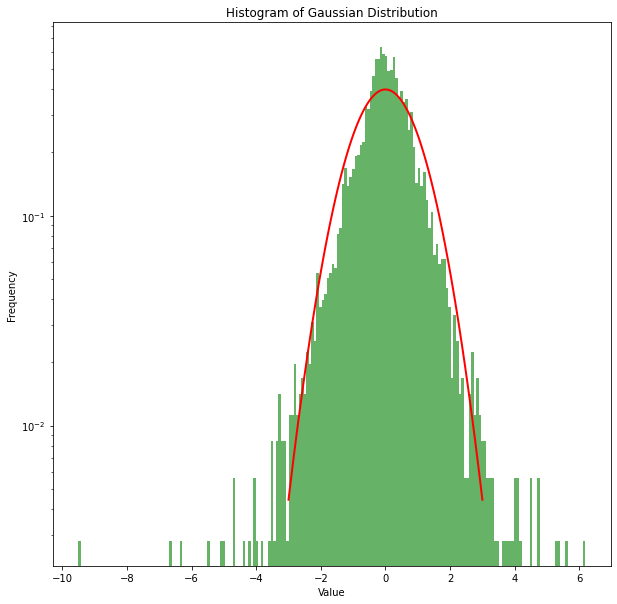

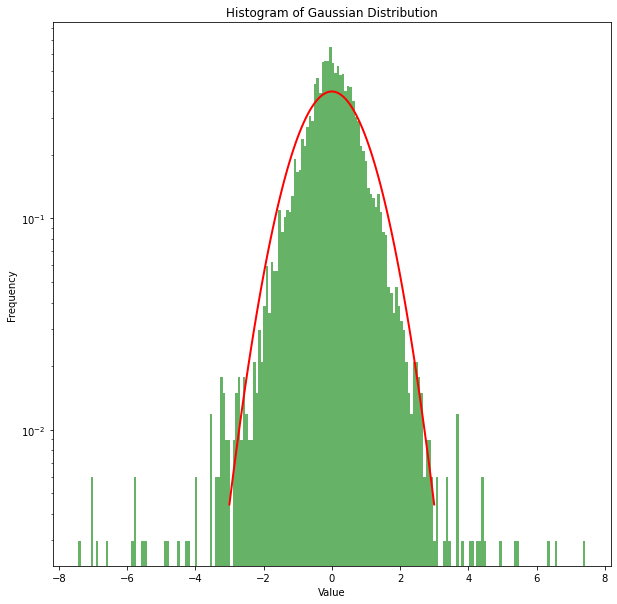

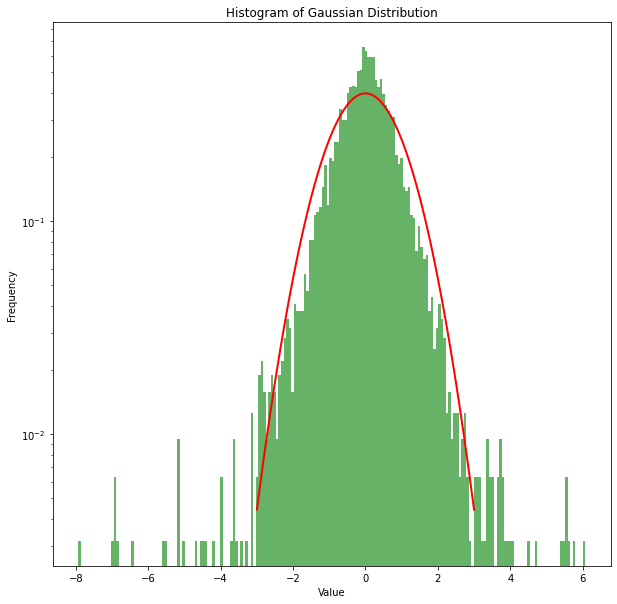

In [19]:
dt1 = returns_df['AAPL']
dt2 = returns_df['ABT']
dt3 = returns_df['ADSK']

data = [dt1, dt2, dt3]

for dt in data:
    isgaussian_plot(dt)



## 2. statistics of returns

Let's plot AAPL stock 

In [ ]:
df_aapl = dfs['AAPL']

- Adj Close Price

In [ ]:
# plotting

# adjusted close price
df_aapl.plot(y='Adj Close', title="adjusted close vs time", xlabel="date", ylabel="price"\
             ,fontsize=15\
            ,kind='line')

In [ ]:
df_aapl['rolling_mean'] = df_aapl['Adj Close'].rolling(window=250).mean()
df_aapl['rolling_std'] = df_aapl['Adj Close'].rolling(window=250).std()

plt.figure(figsize=(10, 6))
plt.plot(df_aapl.index, df_aapl['Adj Close'], label='adjusted close')
plt.plot(df_aapl.index, df_aapl['rolling_mean'], label='rolling mean')
plt.fill_between(df_aapl.index, df_aapl['rolling_mean'] - df_aapl['rolling_std'], df_aapl['rolling_mean'] + df_aapl['rolling_std'], alpha=0.9, label='Rolling Standard Deviation')
plt.legend(loc='upper left')
plt.title('AAPL adj close with Rolling Mean and Standard Deviation', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

- log returns

In [ ]:
# log returns
df_aapl.plot(y='resc_log_ret', title="rescaled log returns", kind='line', color="green")

# density of log returns
df_aapl.plot(y='resc_log_ret', title="distribution of rescaled log returns", kind='density', color="green")

- variogram

In [ ]:
def variogram(x, taus):
    v = np.vectorize(lambda T: ((x - x.shift(T)).var()))
    return v(taus)

taus = np.arange(0, 500, dtype=int)
logp = np.log(df_aapl['Adj Close'])
V = variogram(logp, taus) / variogram(logp, 1)

In [ ]:
plt.plot(taus, V, label='empirical')
plt.plot(taus, taus, label='linear')
plt.ylabel(r'$V(\tau)$')
plt.xlabel(r'$\tau$')
plt.legend()

This confirm that the distribution of the log-price is far from a brownian motion behaviour. Indeed, if the increments of the log-price would have been gaussian I would have expected a behaviour of the variogram linear with taus

----

- compare our log-returns with syntetic data assuming brownian motion as underlying process

In [ ]:
def return_delta(delta):
    return np.log(df_aapl['Adj Close']/df_aapl['Adj Close'].shift(delta))

daily_ret = return_delta(1)
print("Daily average: {:.2f}%".format(daily_ret.mean()*100))
print("Daily vol: {:.2f}%".format(daily_ret.var()*100))
yearly_ret = return_delta(250)
print("Yearly average: {:.2f}%".format(yearly_ret.mean()*100))
print("Yearly vol: {:.2f}%".format(yearly_ret.var()*100))

fig, axs = plt.subplots(nrows=2, figsize = (10,10))
synthetic = daily_ret.mean() + daily_ret.std() * np.random.randn(len(daily_ret))

axs[0].plot(daily_ret) # daily return (log) of SPY
axs[1].plot(daily_ret.index, synthetic) # simulated daily return using a Brownian Motion with σ -> imagining a gaussian variation of the prices
axs[1].set_ylim(axs[0].get_ylim()) 

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
#alpha sets the transparency of a plot
ax.plot(daily_ret, alpha=0.8, label = 'Real data')
ax.plot(daily_ret.index, synthetic, alpha=0.5, label = 'Gaussian returns')
plt.legend()

In [ ]:
plt.figure(figsize=(10,10))
sigma = daily_ret.std()

#x axis for density plots
xs = np.logspace(-3,-0.8, 100)

#gaussian and student densities
y_normal = scipy.stats.norm.sf(x = xs , scale = sigma)
y_student = scipy.stats.t.sf(x = xs, scale = sigma*0.7, df = 3)


#positive daily_ret: right tail
#bins='sqrt' tells the plt.hist function to automatically choose the bins for the histogram
#(see e.g. the np.histogram doc file)
#density = true tells the function to normalize the cumulative histogram
plt.hist(daily_ret.dropna(),bins='sqrt',\
         density = True, cumulative = - 1, \
         histtype='step', label='Positive returns' );

#minus sign for negative returns
plt.hist(-daily_ret.dropna(),bins='sqrt',\
         density = True, cumulative = - 1,\
         histtype='step', label='Negative returns' );

#plot densities
plt.plot(xs, y_normal, label= 'gaussian')
plt.plot(xs, y_student, label = 'student t')

#set a log scale (and therefore only positive x values are visible)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4,1e0)
plt.title('Daily returns')
plt.legend()

It seems closer to a **Student distribution**

## 3. correlation and lagged correlation matrix

### Correlation

In [ ]:
'''
tau = 0

# autocorrelation function for a pd.series x
def corr(x, taus): 
    c = np.vectorize(lambda T: (x * x.shift(-T)).mean() / (x.var()) )
    return c(taus)

# lagged correlation function between two series x and y
def crosscorr(x, y, taus):
    c = np.vectorize(lambda T: (x * y.shift(-T)).mean() / (x.std() * y.std()))
    return c(taus)
    
def check_well_defined(correlation_matrix):
    # convert the pandas dataframe to a numpy array
    corr_matrix = df.values

    # check if diagonal elements are equal to 1
    if not np.allclose(np.diag(corr_matrix), 1):
        print("Diagonal elements are not equal to 1.")

    # check if off-diagonal elements are between -1 and 1
    if not np.all((corr_matrix >= -1) & (corr_matrix <= 1)):
        print("Off-diagonal elements are not between -1 and 1.")

    # check if matrix is symmetric
    if not np.allclose(corr_matrix, corr_matrix.T):
        print("Matrix is not symmetric.")
        


## VERSION 1
# set the time shift (in number of rows) for cross-correlation calculation -> by default = 0, I have a simple correlation between stocks

def cross_corr(returns_df, tau=0):
    '''
    ingredients: 
        1) dataframe with all the log-returns of the stocks
        2) tau - lagging time
                
    '''
    cross_corr_matrix = pd.DataFrame(columns=returns_df.columns, index=returns_df.columns)
    for i in range(len(returns_df.columns)):
        for j in range(len(returns_df.columns)):
            cross_corr_matrix.iloc[i,j] = np.correlate(returns_df.iloc[:,i], returns_df.iloc[tau:,j], mode='valid')[0]
    return cross_corr_matrix #justified a posteriori looking at the values on the diagonal
    
    
## VERSION 2 
# compute the cross-correlation matrix
# set the time shift (in number of rows) for cross-correlation calculation -> by default = 0, I have a simple correlation between stocks

def cross_corr(returns_df, tau=0):
    cross_corr_matrix = pd.DataFrame(columns=returns_df.columns, index=returns_df.columns)
    for i in range(len(returns_df.columns)):
        for j in range(len(returns_df.columns)):
            cross_corr_matrix.iloc[i,j] = (returns_df.iloc[:,i]*returns_df.iloc[tau:,j]).mean()
    return cross_corr_matrix 
'''

In [ ]:
'''
taus = np.arange(-200,200, dtype='int')
fig, axs = plt.subplots(10,1) # ATT: since the len(tickers) = 10

k = 0
for ticker, df in dfs.items():
    C = corr(df['resc_log_ret'], taus)
    ax = axs[k]
    ax.plot(taus, C)
    k += 1
plt.show()



## Correlation on the absolute rescaled log return 

for ticker, df in dfs.items():
    C = corr(np.abs(df['resc_log_ret']), taus)
    plt.plot(taus, C)
'''

In [70]:
# extract the rescaled logreturns price column from each dataframe and store them in a new dictionary
returns = {}
for symbol, df in dfs.items():
    returns[symbol] = df['resc_log_ret']

# create a new dataframe containing the adjusted close price data for all stocks
returns_df = pd.DataFrame(returns)
returns_df.head()

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,0.437417,-0.759276,-1.264348,-1.441416,-1.149306,-2.736787,0.097674,-0.844590,-1.582635,-0.998735,...,-0.676741,-0.031898,-0.303904,-1.157479,-0.120651,-1.333532,-0.757743,-1.237582,-0.260019,-0.672047
2005-01-05,0.365701,-0.861085,-0.279571,0.210056,-0.325240,0.297185,0.426610,-0.754663,-0.635695,-0.994981,...,-1.629853,-1.577006,-0.379409,-1.560428,-1.657035,-0.839465,-0.971443,-0.377789,-0.353171,-1.872057
2005-01-06,-0.014989,1.571329,-0.798343,-0.108909,-0.504493,-0.210429,0.055256,-0.338469,-0.048135,0.542642,...,0.500819,0.331231,0.264897,0.179915,-0.682877,0.786972,-0.439917,0.219325,0.238490,0.119432
2005-01-07,3.315365,1.189137,0.007063,0.050423,-0.165854,-0.949530,0.058907,0.113691,0.269121,0.103076,...,-0.048343,-0.099325,-0.262520,0.091584,0.504332,0.256803,-0.299598,-0.723592,-0.465658,0.214828
2005-01-10,-0.253160,0.660987,0.007045,-0.225066,0.012646,-0.085478,0.058817,0.033655,0.279941,0.622630,...,0.051021,-0.310767,0.184371,0.614014,0.113422,-0.178459,0.193132,0.307708,0.337706,-0.216887


*Correlation*

In [71]:
corr = returns_df.corr(method = 'pearson')
corr.values # if you want a numpy array or
corr = from_df_to_np(corr) 

corr

array([[1.        , 0.34763931, 0.49013827, ..., 0.2633788 , 0.39174597,
        0.36464937],
       [0.34763931, 1.        , 0.41409843, ..., 0.3138444 , 0.40071578,
        0.3535165 ],
       [0.49013827, 0.41409843, 1.        , ..., 0.27217625, 0.4369474 ,
        0.42476345],
       ...,
       [0.2633788 , 0.3138444 , 0.27217625, ..., 1.        , 0.32552233,
        0.25047843],
       [0.39174597, 0.40071578, 0.4369474 , ..., 0.32552233, 1.        ,
        0.536659  ],
       [0.36464937, 0.3535165 , 0.42476345, ..., 0.25047843, 0.536659  ,
        1.        ]])

----

**Heatmap**

In [ ]:
import seaborn as sns

When dealing with large correlation matrices, it's important to optimize the visualization to avoid overcrowding and improve readability

In [ ]:
tau = 0
sns.heatmap(corr, cmap='PuOr', center=0, annot=True, annot_kws={"size": 8})

plt.title(f"Cross-Correlation Matrix at Tau = {tau}")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

since MSTF seems to be higly correlated with Pepsi let's plot the two returns:

In [ ]:
ax = dfs["MSFT"].plot(y='resc_log_ret', title="adjusted close vs time", xlabel="date", ylabel="price"\
             ,fontsize=15\
            ,kind='line')
dfs["KO"].plot(y='resc_log_ret', ax = ax,kind='line')
plt.show()

**Network graph visualization**

The network graph visualization of the cross-correlation matrix can be used to gain insights into the relationships between the different stocks. The nodes in the graph represent the individual stocks, and the edges between nodes represent the strength and sign of the cross-correlations between the corresponding pairs of stocks.


Here are some interpretations of the different aspects of the graph:

- Node size: The size of each node in the graph can be used to represent a stock's market capitalization, trading volume, or some other measure of its importance or influence.

- Edge width: The width of each edge in the graph can be used to represent the strength of the cross-correlation between the corresponding pair of stocks. Thicker edges indicate stronger correlations, while thinner edges indicate weaker correlations.

- Edge color: The color of each edge can be used to represent the sign of the cross-correlation between the corresponding pair of stocks. Positive correlations can be represented by one color (e.g., green), while negative correlations can be represented by another color (e.g., red).

- Network structure: The overall structure of the network can reveal patterns of relationships between stocks. For example, if there are clusters of nodes that are more tightly connected to each other than to other nodes, this may indicate that there are subgroups of stocks that tend to move together or are influenced by similar market factors.

- Node centrality: Measures of node centrality (e.g., degree centrality, betweenness centrality, or eigenvector centrality) can be used to identify stocks that are more central or influential in the network, and therefore may have a greater impact on the overall behavior of the market.

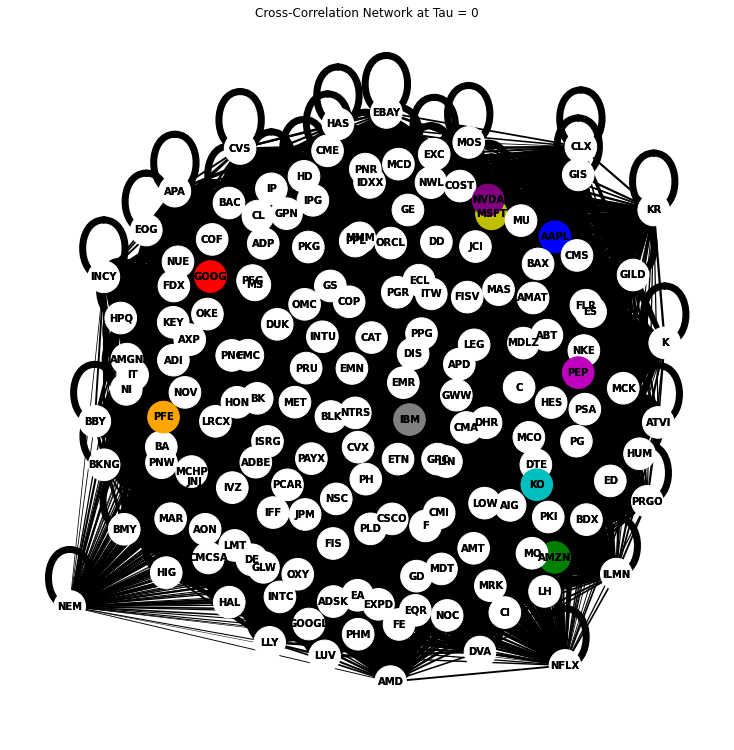

In [236]:
import networkx as nx

#FOR TICKERS WITH TEN STOCKS

# Create a graph object from the cross-correlation matrix
G = nx.from_numpy_array(cross_corr_array)

# Set node labels to be the column names of the original DataFrame
labels = dict(zip(range(len(cross_corr_matrix.columns)), cross_corr_matrix.columns))
G = nx.relabel_nodes(G, labels)

# Set node positions using a spring layout algorithm
pos = nx.spring_layout(G)

# Set edge widths to be proportional to the absolute value of the correlation coefficients
edge_widths = [abs(data['weight'])*7 for u, v, data in G.edges(data=True)]

# Draw the graph with edge widths proportional to the absolute value of the correlation coefficients
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10, font_weight='bold', width=edge_widths)

# Set node colors to be based on their industry sector (if available)
sector_colors = {'AAPL': 'b', 'AMZN': 'g', 'GOOG': 'r', 'MSFT': 'y', 'KO': 'c', 'PEP': 'm', 'JNJ': 'k', 'PFE': 'orange', 'NVDA': 'purple', 'IBM': 'grey'}
node_colors = [sector_colors.get(node, 'w') for node in G.nodes()]  
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)

# Set node labels to be the stock symbols
node_labels = dict(zip(G.nodes(), G.nodes()))
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Set plot title and axis labels
plt.title(f"Cross-Correlation Network at Tau = {tau}")
plt.xlabel("Stocks")
plt.ylabel("Stocks")

# Show plot
plt.show()

StopIteration: 

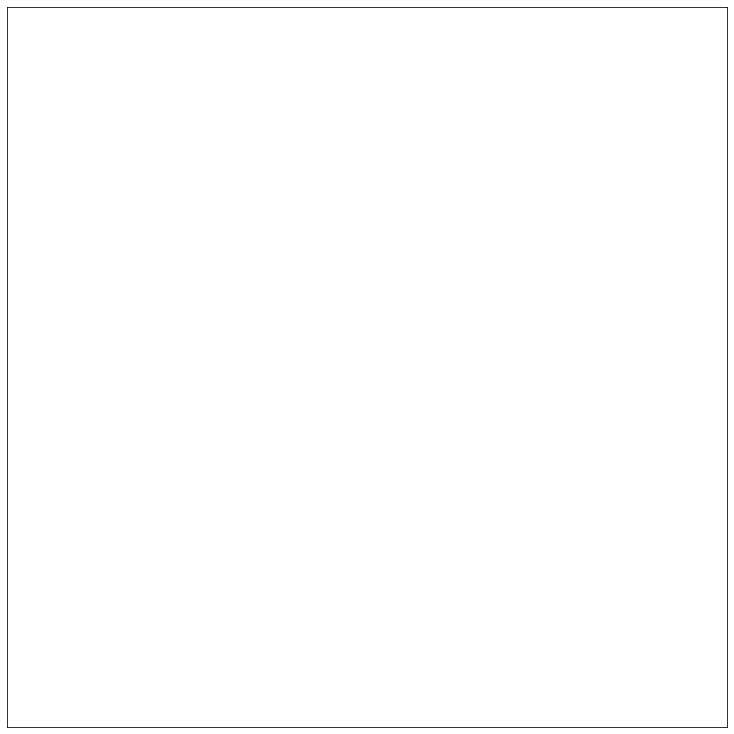

In [118]:
import networkx as nx

# more than 10 stocks tickers

# Create a graph object from the cross-correlation matrix
G = nx.from_numpy_array(cross_corr_array)

# Set node labels to be the column names of the original DataFrame
labels = dict(zip(range(len(cross_corr_matrix.columns)), cross_corr_matrix.columns))
G = nx.relabel_nodes(G, labels)

# Set node positions using a spring layout algorithm
pos = nx.spring_layout(G)

# Set edge widths to be proportional to the absolute value of the correlation coefficients
#edge_widths = [abs(data['weight'])*7 for u, v, data in G.edges(data=True)]

# Draw the graph with edge widths proportional to the absolute value of the correlation coefficients
nx.draw(G, pos, with_labels=True, node_size=20, font_size=2, font_weight='bold')

# Set node colors to be based on their industry sector (if available)
#sector_colors = {'AAPL': 'b', 'AMZN': 'g', 'GOOG': 'r', 'MSFT': 'y', 'KO': 'c', 'PEP': 'm', 'JNJ': 'k', 'PFE': 'orange', 'NVDA': 'purple', 'IBM': 'grey'}
#node_colors = [sector_colors.get(node, 'w') for node in G.nodes()]  
nx.draw_networkx_nodes(G, pos, node_size=1000)

# Set node labels to be the stock symbols
node_labels = dict(zip(G.nodes(), G.nodes()))
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Set plot title and axis labels
plt.title(f"Cross-Correlation Network at Tau = {tau}")
plt.xlabel("Stocks")
plt.ylabel("Stocks")

# Show plot
plt.show()

**Parallel coordinates plot**

A parallel coordinates plot is a type of visualization that can be used to plot multivariate data. In this plot, each variable is represented by a vertical axis and the data points are plotted as connected line segments across all the axes.

For example, in your case, each stock would be a variable, and the cross-correlations between the stocks would be the data points. The plot would have one vertical axis for each stock and the cross-correlation values would be plotted as line segments connecting the corresponding points on each axis.

The benefit of using a parallel coordinates plot is that it allows you to easily identify patterns and relationships between the different variables. For instance, you could use this plot to identify which stocks tend to move together or which stocks have negative correlations.

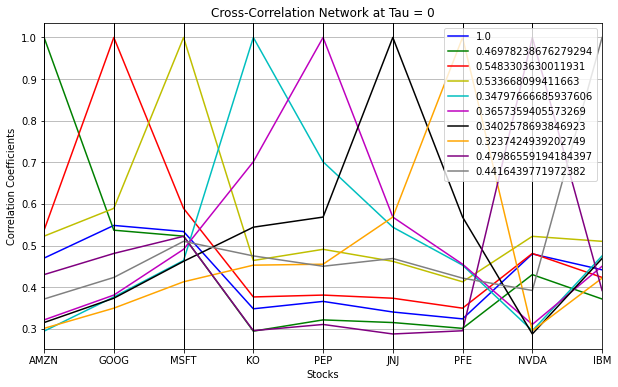

In [31]:
# Create parallel coordinates plot
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(cross_corr_matrix, 'AAPL', color=['b', 'g', 'r', 'y', 'c', 'm', 'k', 'orange', 'purple', 'grey'])
plt.title(f"Cross-Correlation Network at Tau = {tau}")
plt.xlabel("Stocks")
plt.ylabel("Correlation Coefficients")
plt.show()

### Lagged correlations

**$\tau = 10$**

In [311]:
tau = 20
cross_corr_matrix = cross_corr(returns_df, tau)
cross_corr_matrix

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
AAPL,0.996105,0.348645,0.491785,0.491396,0.450657,0.45432,0.285224,0.499415,0.385024,0.347356,...,0.389785,0.395962,0.360295,0.43053,0.284022,0.43225,0.307414,0.265308,0.393602,0.366136
ABT,0.348645,1.001643,0.415457,0.408628,0.500912,0.398487,0.256746,0.3848,0.295332,0.475611,...,0.446608,0.364809,0.353076,0.40426,0.390154,0.435692,0.386865,0.314411,0.402198,0.354336
ADBE,0.491785,0.415457,1.002272,0.540013,0.546414,0.600791,0.293932,0.531904,0.418156,0.377899,...,0.476533,0.474955,0.389154,0.472437,0.344974,0.480307,0.330851,0.27279,0.438491,0.426327
ADI,0.491396,0.408628,0.540013,1.001806,0.536378,0.53577,0.310428,0.702426,0.492588,0.377819,...,0.463328,0.436691,0.423705,0.513642,0.347139,0.539983,0.344149,0.292086,0.459052,0.383216
ADP,0.450657,0.500912,0.546414,0.536378,1.000313,0.49368,0.381147,0.53034,0.369806,0.451254,...,0.473342,0.50882,0.474335,0.552255,0.495536,0.58374,0.47519,0.317214,0.525606,0.494671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPG,0.43225,0.435692,0.480307,0.539983,0.58374,0.504937,0.388461,0.534122,0.363807,0.380243,...,0.499926,0.554132,0.548997,0.629626,0.45298,1.002978,0.453657,0.325267,0.578882,0.498924
PPL,0.307414,0.386865,0.330851,0.344149,0.47519,0.305464,0.317741,0.336576,0.217474,0.331391,...,0.32189,0.440215,0.357377,0.421941,0.700605,0.453657,1.002091,0.272846,0.402423,0.431032
PRGO,0.265308,0.314411,0.27279,0.292086,0.317214,0.293735,0.208078,0.277254,0.204578,0.306382,...,0.289705,0.261513,0.271214,0.326908,0.268354,0.325267,0.272846,1.002096,0.326364,0.250549
PRU,0.393602,0.402198,0.438491,0.459052,0.525606,0.428014,0.49277,0.468968,0.333637,0.362153,...,0.432478,0.588816,0.70169,0.543376,0.401096,0.578882,0.402423,0.326364,1.003769,0.538479


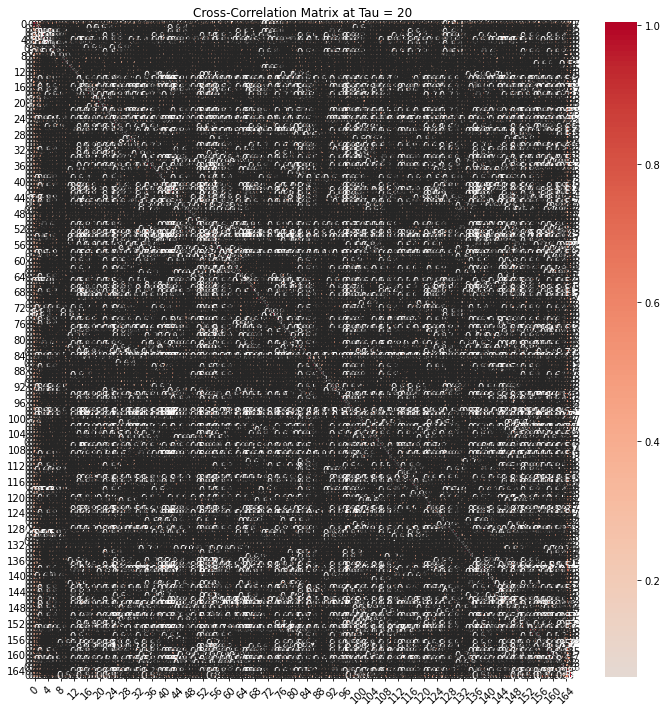

In [313]:
sns.heatmap(cross_corr_array, cmap='coolwarm', center=0, annot=True)
# try without annot = True
plt.title(f"Cross-Correlation Matrix at Tau = {tau}")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Convert DataFrame to numpy array
cross_corr_array = from_df_to_np(cross_corr_matrix) 

### Eigedecomposition

https://towardsdatascience.com/principal-component-analysis-from-the-ground-up-with-python-754399f88923

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

tau = 0

In [16]:
corr = returns_df.corr()
corr = from_df_to_np(corr) 

In [17]:
corr

array([[1.        , 0.34763978, 0.49013855, ..., 0.26337916, 0.3917456 ,
        0.36464964],
       [0.34763978, 1.        , 0.41409842, ..., 0.31384449, 0.40071529,
        0.35351682],
       [0.49013855, 0.41409842, 1.        , ..., 0.27217601, 0.43694716,
        0.4247631 ],
       ...,
       [0.26337916, 0.31384449, 0.27217601, ..., 1.        , 0.32552221,
        0.25047775],
       [0.3917456 , 0.40071529, 0.43694716, ..., 0.32552221, 1.        ,
        0.53665863],
       [0.36464964, 0.35351682, 0.4247631 , ..., 0.25047775, 0.53665863,
        1.        ]])

In [18]:
# eigendecomposition of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(corr)

# sort the eigenvalues and eigenvectors in descending order
sorted_indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#If the eigenvalues are complex, the sort order is lexicographic 
#(that is, complex numbers are sorted according to their real part first,
#with ties broken by their imaginary part).

In [25]:
eigenvalues

array([7.01117876e+01, 6.87239559e+00, 4.65500198e+00, 4.11903794e+00,
       2.61322819e+00, 2.31804056e+00, 1.81415792e+00, 1.66169452e+00,
       1.50910436e+00, 1.39750373e+00, 1.26132832e+00, 1.23070999e+00,
       1.17936481e+00, 1.12882419e+00, 1.04495624e+00, 9.82089771e-01,
       9.58970707e-01, 9.39938017e-01, 8.99147824e-01, 8.87473205e-01,
       8.67890917e-01, 8.36569816e-01, 8.30290167e-01, 8.01844598e-01,
       7.96939694e-01, 7.72544726e-01, 7.48742292e-01, 7.42436688e-01,
       7.37326936e-01, 7.28512567e-01, 7.20385430e-01, 6.94948981e-01,
       6.88486428e-01, 6.81946808e-01, 6.77891644e-01, 6.66097733e-01,
       6.60762004e-01, 6.59737117e-01, 6.46483059e-01, 6.34398123e-01,
       6.33677665e-01, 6.27208972e-01, 6.21339582e-01, 6.15073781e-01,
       6.05846741e-01, 5.99929153e-01, 5.89841150e-01, 5.81729044e-01,
       5.75639276e-01, 5.75080108e-01, 5.67422673e-01, 5.62964000e-01,
       5.56304253e-01, 5.53878384e-01, 5.38691989e-01, 5.37377249e-01,
      

In [26]:
eigenvectors

array([[ 7.07908060e-02, -1.22356903e-02, -1.21229180e-01, ...,
        -2.77996238e-03, -1.81573434e-03,  3.12771935e-04],
       [ 7.05535608e-02,  1.14206203e-01, -7.39040448e-02, ...,
        -2.09862331e-02, -1.32176075e-02, -2.79614463e-03],
       [ 7.75955153e-02,  6.59071808e-03, -1.49858619e-01, ...,
        -9.36180599e-03, -1.04275532e-02, -1.58229500e-03],
       ...,
       [ 5.23749165e-02,  1.92338429e-02, -1.58950259e-02, ...,
        -7.41768446e-03, -1.58718974e-02, -1.38916744e-04],
       [ 9.10781622e-02, -7.66034034e-02,  5.28799331e-02, ...,
         5.42165123e-01,  4.40604299e-01, -1.61342925e-03],
       [ 7.89365408e-02,  3.93578401e-02, -3.75364971e-03, ...,
        -9.15272146e-04, -7.32394823e-02, -3.74823215e-04]])

In [19]:
# Project the data onto principal components
# use the eigenvectors to perform PCA

#pca_data = np.dot(returns_df, eigenvectors)
pca_data = np.dot(returns_df, eigenvectors)

In [28]:
len(pca_data[:,2]) # timeseries transformed for the 3rd stock

4525

In [194]:
# plot the results
import matplotlib.pyplot as plt

plt.scatter(pca_data[:, 0], pca_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

NameError: name 'pca_data' is not defined

In [60]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio

array([4.22360139e-01, 4.13999828e-02, 2.80421913e-02, 2.48134794e-02,
       1.57423260e-02, 1.39640929e-02, 1.09286643e-02, 1.00102100e-02,
       9.09099386e-03, 8.41869553e-03, 7.59836337e-03, 7.41391189e-03,
       7.10460746e-03, 6.80014882e-03, 6.29492090e-03, 5.91620128e-03,
       5.77693356e-03, 5.66227875e-03, 5.41655259e-03, 5.34622549e-03,
       5.22826035e-03, 5.03958087e-03, 5.00174517e-03, 4.83038732e-03,
       4.80084459e-03, 4.65389007e-03, 4.51049976e-03, 4.47251204e-03,
       4.44172845e-03, 4.38863014e-03, 4.33967337e-03, 4.18644178e-03,
       4.14751308e-03, 4.10811558e-03, 4.08368350e-03, 4.01264028e-03,
       3.98049629e-03, 3.97432198e-03, 3.89447406e-03, 3.82167844e-03,
       3.81733329e-03, 3.77836813e-03, 3.74300638e-03, 3.70526143e-03,
       3.64968104e-03, 3.61403106e-03, 3.55325656e-03, 3.50439078e-03,
       3.46770486e-03, 3.46433612e-03, 3.41820950e-03, 3.39135009e-03,
       3.35123365e-03, 3.33661524e-03, 3.24513415e-03, 3.23721155e-03,
      

In [62]:
# Check that everything is correct with scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components=len(listed_true)).fit(returns_df)
assert np.allclose(np.abs(pca.components_), np.abs(eigenvectors.T)) # it's the same!

## Modes

### RMT - Paster Marcenko distribution 

https://github.com/emoen/Machine-Learning-for-Asset-Managers/blob/master/Machine_Learning_for_Asset_Managers/ch2_marcenko_pastur_pdf.py

In [120]:
corr = returns_df.corr(method = 'pearson')
corr

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
AAPL,1.000000,0.347639,0.490139,0.490133,0.447961,0.453442,0.284185,0.497126,0.389710,0.345462,...,0.389421,0.394294,0.358369,0.429500,0.282813,0.431178,0.306450,0.263379,0.391746,0.364649
ABT,0.347639,1.000000,0.414098,0.407408,0.499298,0.397498,0.255779,0.383905,0.297049,0.474925,...,0.445543,0.363829,0.351748,0.403080,0.388894,0.434808,0.385170,0.313844,0.400716,0.353516
ADBE,0.490139,0.414098,1.000000,0.539315,0.544928,0.601539,0.292808,0.531357,0.418549,0.377378,...,0.474980,0.472881,0.387965,0.470935,0.343539,0.479060,0.330131,0.272176,0.436947,0.424763
ADI,0.490133,0.407408,0.539315,1.000000,0.535610,0.536361,0.309443,0.701051,0.492306,0.377829,...,0.462698,0.434676,0.422508,0.512466,0.345557,0.538673,0.343080,0.291412,0.457645,0.381889
ADP,0.447961,0.499298,0.544928,0.535610,1.000000,0.492567,0.380176,0.529094,0.368941,0.450457,...,0.472070,0.507286,0.473469,0.550739,0.493713,0.581692,0.473589,0.317421,0.524261,0.493941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPG,0.431178,0.434808,0.479060,0.538673,0.581692,0.504583,0.386814,0.532715,0.364142,0.379627,...,0.498838,0.552009,0.546799,0.627925,0.451043,1.000000,0.452110,0.324465,0.576714,0.497188
PPL,0.306450,0.385170,0.330131,0.343080,0.473589,0.303117,0.316266,0.336129,0.216485,0.330447,...,0.320972,0.438637,0.356237,0.420659,0.697996,0.452110,1.000000,0.272974,0.400987,0.429871
PRGO,0.263379,0.313844,0.272176,0.291412,0.317421,0.292632,0.207337,0.277285,0.204679,0.305683,...,0.288885,0.260759,0.270263,0.325912,0.267215,0.324465,0.272974,1.000000,0.325522,0.250478
PRU,0.391746,0.400716,0.436947,0.457645,0.524261,0.426938,0.490838,0.467447,0.332760,0.361115,...,0.430862,0.586637,0.699047,0.541653,0.399478,0.576714,0.400987,0.325522,1.000000,0.536659


In [121]:
# Parametres
N= len(corr)
T= len(returns_df)
Q= T/N

In [122]:
from sklearn.neighbors import KernelDensity
import matplotlib.pylab as plt
from scipy.optimize import minimize
from scipy.linalg import block_diag
from sklearn.covariance import LedoitWolf


# q=T/N time steps divided by the number of companies
def mpPDF(var, q, pts):
    eMin, eMax = var*(1-(1./q)**.5)**2, var*(1+(1./q)**.5)**2 # calc lambda_minus, lambda_plus
    eVal = np.linspace(eMin, eMax, pts) #Return evenly spaced numbers over a specified interval. eVal='lambda'
    #Note: 1.0/2*2 = 1.0 not 0.25=1.0/(2*2)
    pdf = q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5 #np.allclose(np.flip((eMax-eVal)), (eVal-eMin))==True
    pdf = pd.Series(pdf, index=eVal)
    return pdf

# Get PCA
def getPCA(matrix):
    '''
    Get eVal, eVec from a Hermitian matrix
    '''
    eVal, eVec = np.linalg.eigh(matrix) #complex Hermitian (conjugate symmetric) or a real symmetric matrix.
    #eVal, eVec = np.linalg.eig(matrix) #complex Hermitian (conjugate symmetric) or a real symmetric matrix.
    #indices = eVal.argsort()[::-1] #arguments for sorting eval desc
    #eVal,eVec = eVal[indices],eVec[:,indices]
    eVal = np.diagflat(eVal) # identity matrix with eigenvalues as diagonal
    return eVal,eVec

In [123]:
# look scipystats

def fitKDE(obs, bWidth=.15, kernel='gaussian', x=None):
    '''
    Fit kernel to a series of obs, and derive the prob of obs 
    x is the array of values on which the fit KDE will be evaluated
    '''
    #print(len(obs.shape) == 1)
    if len(obs.shape) == 1: obs = obs.reshape(-1,1)
    kde = KernelDensity(kernel = kernel, bandwidth = bWidth).fit(obs)
    #print(x is None)
    if x is None: x = np.unique(obs).reshape(-1,1)
    #print(len(x.shape))
    if len(x.shape) == 1: x = x.reshape(-1,1)
    logProb = kde.score_samples(x) # log(density)
    pdf = pd.Series(np.exp(logProb), index=x.flatten())
    return pdf

This smoothed-out plot, with a Gaussian distribution contributed at the location of each input point, gives a much more accurate idea of the shape of the data distribution, and one which has much less variance (i.e., changes much less in response to differences in sampling).

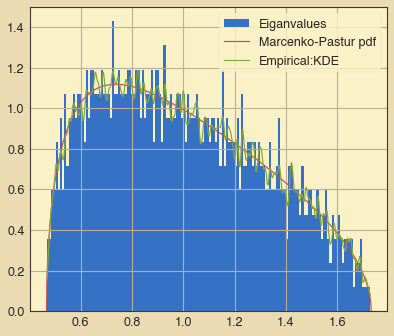

In [124]:
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor = np.corrcoef(x, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.
eVal0 , eVec0 = getPCA(cor) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf


# KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True, bins=150, label="Eiganvalues") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


#plotting
#plt.yscale('log') ## lOG SCALE
plt.legend(loc="upper right")
plt.show()

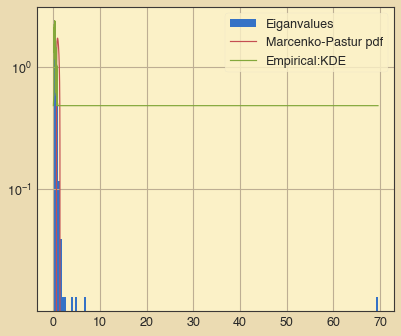

In [125]:
len(cor)
len(returns_df)
N = 166
T = 4525
cor = np.corrcoef(returns_df, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.


#get eigendecomposition
Q = T/N
eVal0 , eVec0 = getPCA( cor ) 
pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf
pdf0 = mpPDF(1., Q, pts=N)


# KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True, bins=150, label="Eiganvalues") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


#plotting
plt.yscale('log') ## lOG SCALE
#plt.xscale('log')
plt.legend(loc="upper right")
plt.show()

Eigenvalues $λ \in [\lambda_{-}, \lambda_{+}]$ are consistent with random behavior, and eigenvalues $λ \notin [\lambda_{-}, \lambda_{+}]$ are consistent with nonrandom behavior. 

### analyzing modes

In [126]:
# correlation matrix
corr = np.corrcoef(returns_df, rowvar=0)  
# eigendecomposition
eVal , eVec = getPCA( corr ) 

In [127]:
np.diag(eVal)[-1] #descending order

69.5606717298831

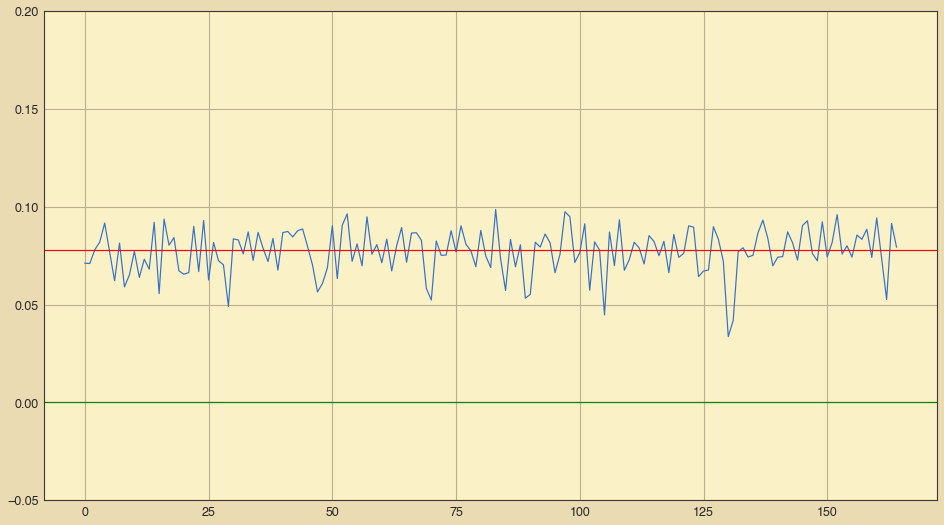

In [128]:
# ASCENDING ORDER FOR EIGENV


# First mode 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(eVec[:, -1].flatten())
ax.axhline(0, c="green")
ax.axhline([1 / (len(corr))**0.5], c="red")
ax.set_ylim(-0.05, 0.2)
plt.show()

As expected the first mode has:
- all positive components  
- they are $\approx 1/N^{1/2}$ 

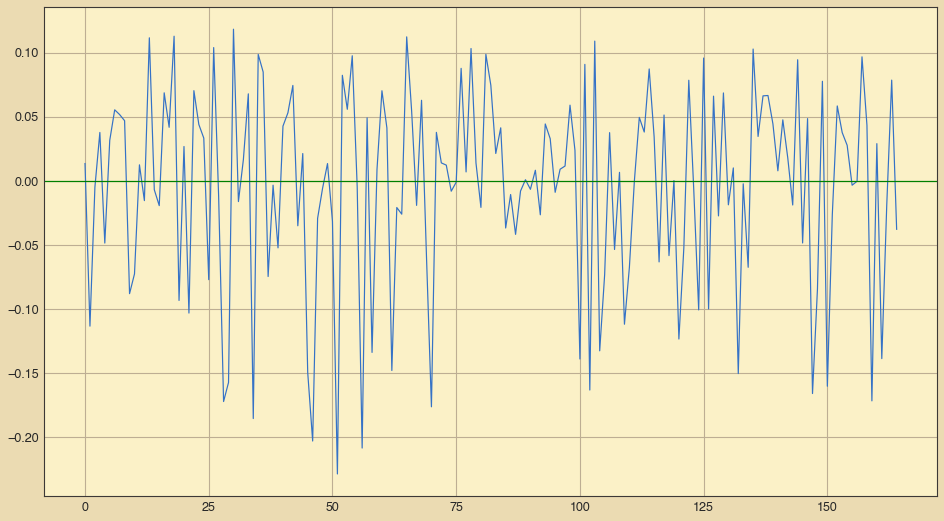

In [129]:
# second mode 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(eVec[:, -2].flatten())
ax.axhline(0, c="green")
#ax.set_ylim(-0.05, 0.2)
plt.show()

**Q:**
- Is there a correlation between different industrial sectors? 
- is this mode a sign of a correlation between an industrial sector. Can it explain this?


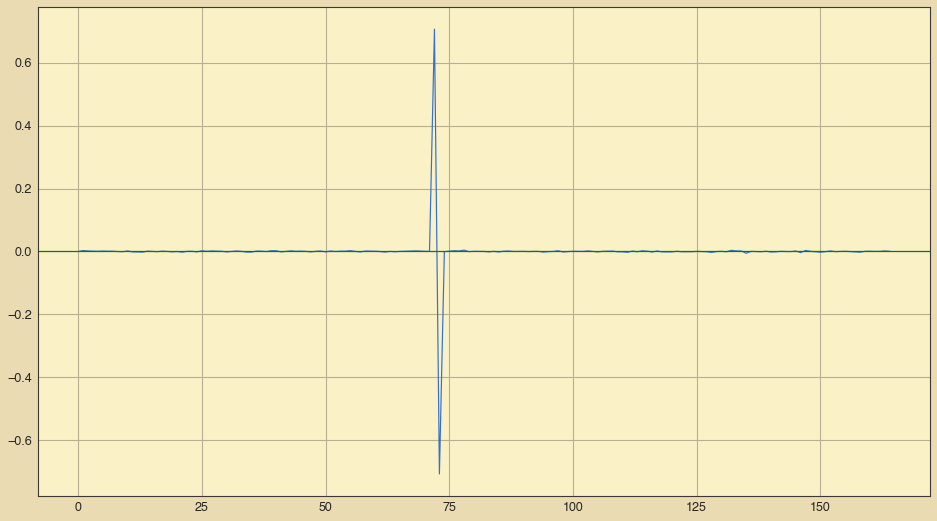

In [139]:
# and so on...

# last mode 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(eVec[:, 0].flatten())
ax.axhline(0, c="green")
#ax.set_ylim(-0.05, 0.2)
plt.show()

---
TO DO:
- study the modes in the PM distribution that are not random, **try to justify them**
- once you have systematized the meaning of the outliers modes. You could **denoise** the matrix, couldnt u?discriminating between noise and signal -> pay heet: shrinkage can further eliminate an already weak signal.
---

- Ordering by sector

In [131]:
idx_by_sector = np.argsort(tick) #tick is my list that assign at each ticker the corresponding sector

# create dictionary mapping sectors to tickers
sector_dict = {}
for i in range(len(tick)):
    sector = tick[i]
    if sector not in sector_dict:
        sector_dict[sector] = []
    sector_dict[sector].append(i)

# sort sector names alphabetically
sector_names = sorted(sector_dict.keys())

# create list of sector labels and corresponding indices
sector_labels = []
sector_indices = []
for sector in sector_names:
    sector_labels.append(sector)
    for i in idx_by_sector:
        if i in sector_dict[sector]:
            sector_indices.append(idx_by_sector.tolist().index(i) + 1) # +1 just to translate it graphically
            break
        

# sort sector indices
sector_indices

[1, 12, 21, 37, 49, 58, 81, 105, 131, 135, 156]

In [132]:
def plot_by_sector(mode):
    
    
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(eVec[idx_by_sector, int(mode)].flatten())
    ax.axhline(0, c="green")
    #ax.set_ylim(-0.05, 0.2)
    # set x-axis labels
    ax.set_xticks(sector_indices)
    ax.set_xticklabels(sector_labels, rotation=45)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink', 'gray', 'black', 'cyan'] # list of colors
    color_idx = 0


    # plot vertical lines at sector boundaries
    prev_sector = tick[idx_by_sector[0]]
    for i in range(1, len(idx_by_sector)):
        curr_sector = tick[idx_by_sector[i]]
        if curr_sector != prev_sector:
            ax.axvline(i-0.5, linestyle='-', color='grey')
            ax.fill_between([i-1, i], -0.1, 0.1, color=colors[color_idx], alpha=0.4)
            #ax.fill_between([i-1, i], ax.get_ylim()[0], ax.get_ylim()[1], color=colors[color_idx], alpha=0.1)
            color_idx = (color_idx + 1) % len(colors) # cycle through the list of colors

            prev_sector = curr_sector

    plt.title("plotting the {0} mode".format(mode))
    plt.show()
    

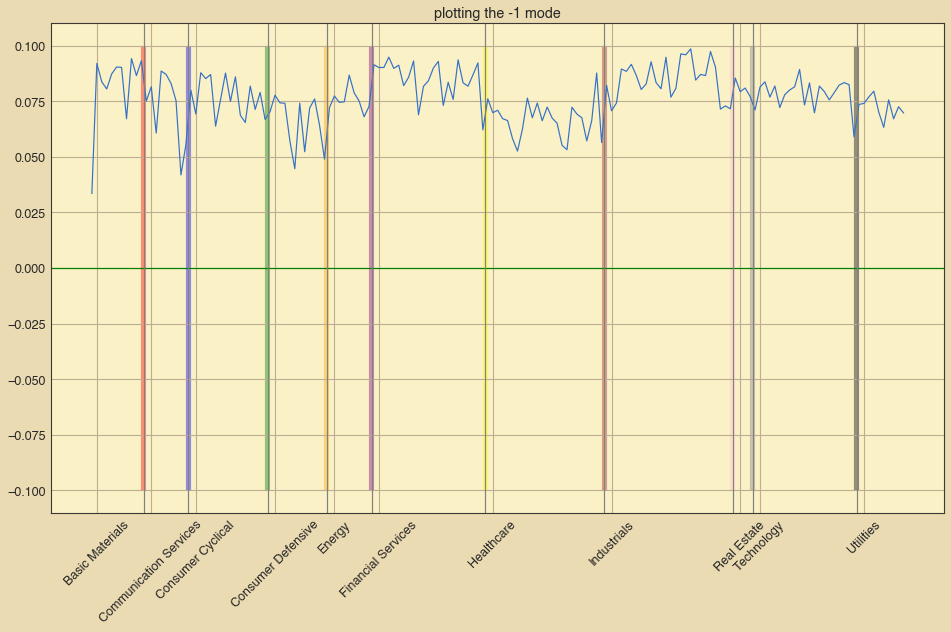

In [133]:
plot_by_sector(-1)

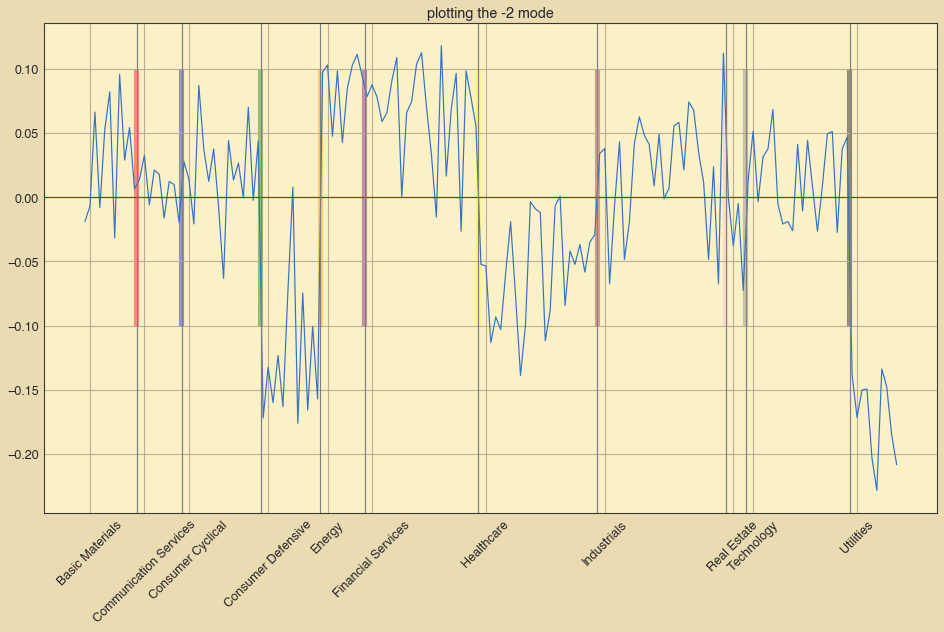

In [134]:
plot_by_sector(-2)

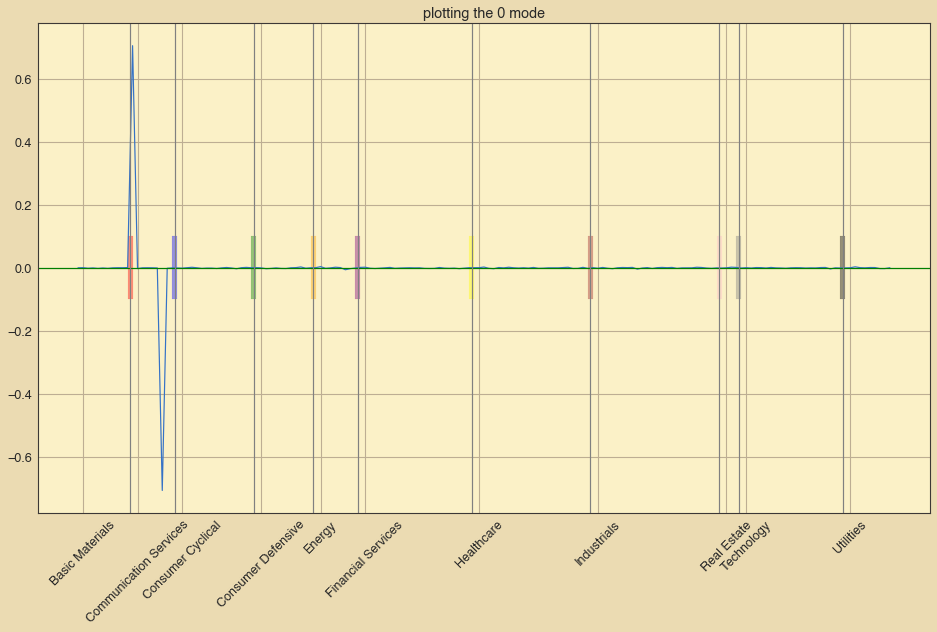

In [135]:
plot_by_sector(0)

check which companies correspond to the two peaks